# 4. encoder and scaler

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame( {'A':['a','b','c','a','b'],
                    'B':[1,2,3,1,0] })

df.head()

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


- a,b,c의 내용을 숫자로 변환시켜주기 위함
    label encoder를 이용 문자를 숫자로!

In [4]:
from sklearn.preprocessing import LabelEncoder 

In [5]:
le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [6]:
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [7]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
# CLASSES에 있는 a,b,c를 적용해라 (fit을 선행하고 진행한다.)
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [9]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [10]:
# 한번에 하는 것도 가능
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [13]:
# array형태로 넣어주면(['a','b']) 각각이 어떤 숫자로 변환되었는지 보여줌
le.transform(['a','b'])

array([0, 1])

In [14]:
# 숫자를 fit한 le기준으로 문자로!
le.inverse_transform(df['B']) # 에러발생, fit할때 요소가 0,1,2밖에 없었기 때문에 3을 인식을 못함!!


ValueError: y contains previously unseen labels: [3]

In [15]:
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

결론: 라벨 인코더는 fit를 하고 난 후 문자를 숫자로 변환하는 데에 주로쓰이고, inverse(숫자-->문자)로도 변환가능

---

## min max scaling (정규화)
- x = (x-min(x))/ (max(x) - min(x)) # 0~1로 나타내보기

In [16]:
df = pd.DataFrame({
    'A':[10,20,-10,0,25],
    'B':[1,2,3,1,0]
    }
)
df.head()

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [18]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df) # 반드시 fit먼저 실행해줘야함

# 0~1 사이 값으로 만들기
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [21]:
# 열 길이 만큼 데이터에 대한 정보를 줌
mms.data_max_, mms.data_min_, mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

---

## standard scaler (표준화)
- x = (x-mean)/sd(표준편차)

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df) # 반드시 fit먼저 실행해줘야함

# 
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [24]:
# 평균, 표준편차
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [25]:
ss.fit_transform(df) # 한번에

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

---

## robust scaler

- 평균을 0(2분위)으로 보고 scaling  
(x - 2분위) / (3분위-1분위)

In [29]:
df = pd.DataFrame({
    'A' : [-.1,0,.1,.2,.3,.4,1,1.1,5]
})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

ms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

# 3가지 방법 scaling 비교
df_scaler = df.copy()

df_scaler['minmax']= ms.fit_transform(df)
df_scaler['standard']= ss.fit_transform(df)
df_scaler['robust']= rs.fit_transform(df)

df_scaler

,A,minmax,standard,robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


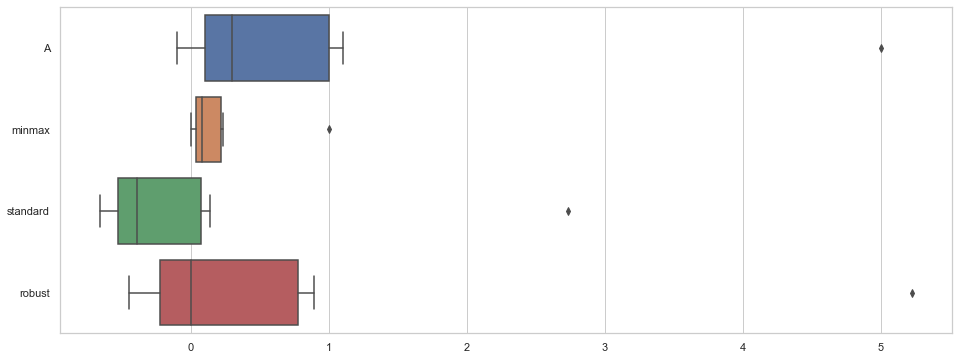

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

plt.figure(figsize=(16,6))
sns.boxplot(data = df_scaler, orient='h')
plt.show()

- minmax는 outlier의 영향을 크게 받아서 왜곡이 생길 수 있음
- standard도 평균을 0으로 판단하고 진행하다 보니 역시 평균에 큰 영향을 미치는 outlier의 영향을 많이 받은 것
- robust는 중앙값을 0으로 판단하고 길이를 1로 만들어서 판단하므로 outlier가 큰 영향을 주지 않음